<a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch?scriptVersionId=117154250" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="table-of-contents" style="background-color:#41BEB9; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#000000;">TOC</h1>
<ol>
    <li><a href="#1" style="color: #000000;">1. Overview</a></li>
      <li><a href="#2" style="color: #000000;">2. Imports</a></li>
    <li><a href="#3" style="color: #000000;">3. Data Analysis</a></li>
    <li><a href="#4" style="color: #000000;">4. Data Preprocessing</a></li>
    <li><a href="#5" style="color: #000000;">5. Model Implementation</a></li>
    <li><a href="#6" style="color: #000000;">6. Evaluation</a></li>
    <li><a href="#7" style="color: #000000;">7. Conclusion</a></li>
<li><a href="#8" style="color: #000000;">8. Thank You</a></li> 
  </ol>
</div>

<a id="1"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Overview</center></h1>
    
    
# Overview
**Previously we've implemented our first regression algorithm [Linear Regression](https://www.kaggle.com/code/fareselmenshawii/from-scratch-linear-regression)**

**In this notebook we'll be implementing our first classification algorithm**

**Let's get started**    

<a id="2"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Imports</center></h1>
    
# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<a id="3"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [5]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [6]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [10]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [11]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [12]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


<a id="4"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing </center></h1>
    
# Data Preprocessing

In [13]:
df.drop('id', axis=1, inplace=True) #drop redundant columns


In [14]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

**Now let's get highly correlated features with the target**

In [15]:
corr = df.corr()

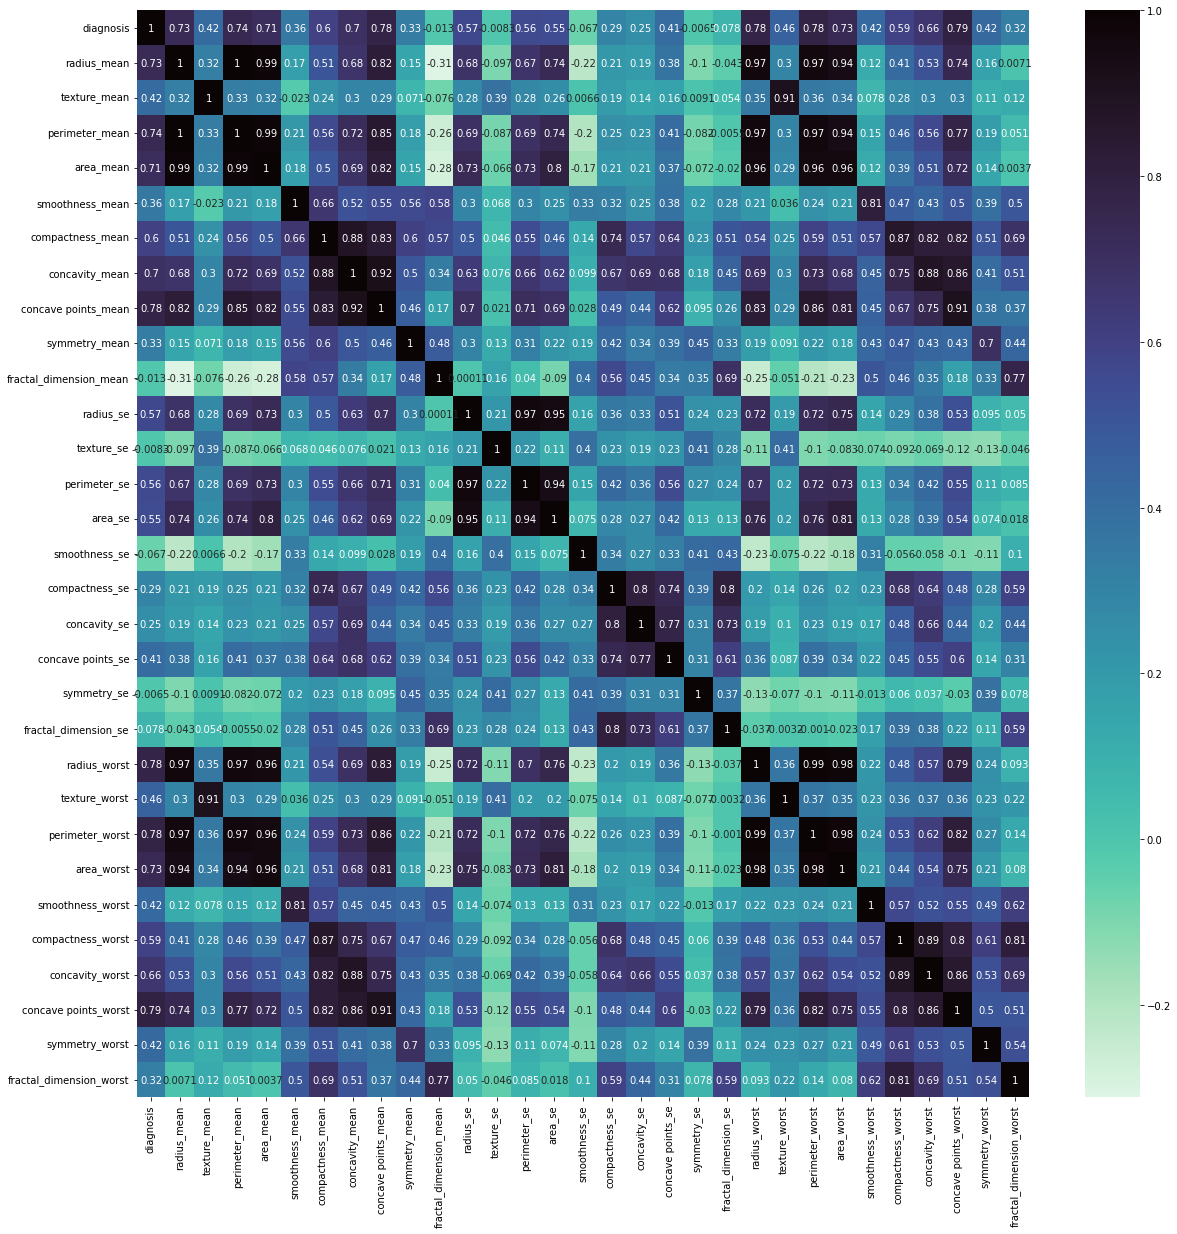

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [17]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [18]:
X = df[names].values
y = df['diagnosis'].values

**Now let's scale the features**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #create an instance of standard scaler
X = scaler.fit_transform(X) # fit it to the training data

<a id="5"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Implementation</center></h1>


# Model Implementation

# Model

**Now let's start implementing the model**

**As always we'll be using [vectorized implementaiton](https://www.kaggle.com/code/fareselmenshawii/vectorization)**

**For Logistic Regression model is represented by:**


***$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$***

# Sigmoid Function

**Where sigmoid function is: $$g(z) = \frac{1}{1+e^{-z}}$$**

In [20]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

**Visualize the shape of the  Logistic function**

In [21]:
z = np.linspace(-12, 12, 200)
fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9"), 
    yaxis=dict(color="#41BEE9") 
)
fig.show()

# Predict function

In [22]:
def predict(X, y, W, b):
    Z = np.matmul(X, W) + b
    A = sigmoid(Z)
    return A

# Cost Function

**Recall that for logistic regression, the cost function is :** 

**$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{}), y^{}) \right]$$**

**where, $loss(f_{\mathbf{w},b}(\mathbf{x}^{}), y^{})$ =**  

 **$$loss(f_{\mathbf{w},b}(\mathbf{x}^{}), y^{}) = (-y^{} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{} \right) \right) - \left( 1 - y^{}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{} \right) \right)$$**
    

In [23]:
def compute_cost(X, y, W, b):
    m = X.shape[0]  # number of training exampeles
    predictions = predict(X, y, W, b) # get predictions
    
    #compute the cost
    cost = np.sum( (-np.log(predictions + 1e-8) * y) + (-np.log(1-predictions + 1e-8))*(1 - y) )# we are adding small value epsilon to avoid log of 0
    cost = cost / m
    return cost

# Gradient Descent

**For Logistic Regression Gradient Descent equations =**

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{}) - \mathbf{y}^{}) \tag{1}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{}) - \mathbf{y}^{})x^{} \tag{2}
$$



In [24]:
def compute_gradient(X, y, W, b):
    #get training shape
    m = X.shape[0]
    
    #compute predictions
    predictions = predict(X, y, W, b)
    
    #compute gradients
    dW = np.matmul(X.T, (predictions-y))
    dW = np.array([np.mean(grad) for grad in dW])
    
    db = np.sum(np.subtract(predictions,y))
    
    #scale gradients
    dW = dW * 1/m
    db = db * 1/m
    
    
    return db, dW

# Logistic Regression Training

In [25]:
def train(X, y, W, b, iterations, alpha): 
    costs = []
    for i in range(iterations):
        
        # Calculate the gradient and update the parameters
        db, dW = compute_gradient(X, y, W, b)   
        
        # Update Parameters using w, b, alpha and gradient
        b = b - alpha * db             
        W = W - alpha * dW               
       
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost(X, y, W, b)
            costs.append(cost)
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/10) == 0 or i == (iterations-1):
            print(f"Iteration {i:4}: Cost {float(costs[-1]):8.2f}   ")
        
    return W, b,costs

In [26]:
np.random.seed(1)
intial_w = np.zeros(X.shape[1])
initial_b = 0.

# Some gradient descent settings
iterations = 80000
alpha = 0.0001

w, b, costs = train(X,y,intial_w, initial_b, iterations, alpha)

Iteration    0: Cost     0.69   
Iteration 8000: Cost     0.28   
Iteration 16000: Cost     0.21   
Iteration 24000: Cost     0.18   
Iteration 32000: Cost     0.16   
Iteration 40000: Cost     0.15   
Iteration 48000: Cost     0.14   
Iteration 56000: Cost     0.13   
Iteration 64000: Cost     0.12   
Iteration 72000: Cost     0.12   
Iteration 79999: Cost     0.11   


<a id="6"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>
    
    
    
# Evaluation

**Evaluate the results on the test set**

**Now let's visualize the training process**

In [27]:
fig = px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title="Iterations"), 
    yaxis=dict(color="#41BEE9",title="cost")
) 

fig.show()

<a id="7"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Conclusion</center></h1>
    
    
    
# Conclusion

**We were able to implement Logistic Regression from scratch**


**Thank you for going through this notebook please leave your feedback**

**For Logistic Regression sklearn implementation please refer to this [notebook](https://www.kaggle.com/code/fareselmenshawii/logistic-regression)**

<a id="8"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>
    
    

# Thank You

**Thank you for going through the notebook if you haev any feedback please let me know**

**Now that we know how to implement Linear Regression from scratch let's check [sklearn implementation](https://www.kaggle.com/code/fareselmenshawii/linear-regression)**



# 